# Importing Required Libraries

In this cell, we import all the necessary Python libraries for our Linear Regression project on California Housing data:

- **numpy**: For numerical calculations and array operations.
- **pandas**: For data manipulation and analysis.
- **matplotlib.pyplot** and **seaborn**: For data visualization and plotting charts.
- **sklearn.model_selection.train_test_split**: To split the dataset into training and testing sets.
- **sklearn.linear_model.LinearRegression**: To create and train the Linear Regression model.
- **sklearn.metrics**: To evaluate the model's performance using metrics such as MSE, MAE, and R².


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn import metrics

In [2]:
data = pd.read_csv('california_housing.csv')

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns= None
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Checking for Missing Values

In this cell, we check for any missing (NaN) values in the dataset. 

- We create a new DataFrame `null` that shows:
  1. **Null Values**: The count of missing values in each column.
  2. **Percentage Null Values**: The percentage of missing values relative to the total number of rows.

This helps us identify which columns need data cleaning before building the model.


In [7]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


# Inspecting Missing Values in 'total_bedrooms'

In this cell, we look at the first few rows where the column `total_bedrooms` has missing values (NaN).

- This allows us to understand **where the missing data occurs**.
- Helps in deciding how to handle missing values (e.g., filling with mean, median, or dropping rows).


In [8]:
data[data.total_bedrooms.isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


# Filling Missing Values in 'total_bedrooms'

In this cell, we handle missing values in the `total_bedrooms` column:

1. Calculate the **mean** of the column and store it in `total_bedrooms_mean`.
2. Fill all missing values (NaN) in `total_bedrooms` with the **mean value**.

This ensures that our dataset has no missing values and is ready for modeling.


In [32]:
total_bedrooms_mean = data.total_bedrooms.mean()
print(total_bedrooms_mean)
data['total_bedrooms'] = data['total_bedrooms'].fillna(total_bedrooms_mean)

537.8705525375617


In [10]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
longitude,0,0.0
latitude,0,0.0
housing_median_age,0,0.0
total_rooms,0,0.0
total_bedrooms,0,0.0
population,0,0.0
households,0,0.0
median_income,0,0.0
ocean_proximity,0,0.0
median_house_value,0,0.0


**check duplicated**

In [11]:
dup_row = data.duplicated().sum()
dup_row

0

In [12]:
data['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Encoding 'ocean_proximity' Column

The column `ocean_proximity` is categorical and contains text labels. 
Linear Regression requires numeric inputs, so we convert these categories to numbers using a mapping:

- 'NEAR BAY' → 0
- '<1H OCEAN' → 1
- 'INLAND' → 2
- 'NEAR OCEAN' → 3
- 'ISLAND' → 4

We use the `.map()` function to apply this mapping to the `ocean_proximity` column.


In [13]:
ocean_proximity_mapping = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}

data['ocean_proximity'] = data['ocean_proximity'].map(ocean_proximity_mapping)


In [14]:
data['ocean_proximity'].sample(10)

16973    3
12627    2
4204     1
9077     2
2234     2
16082    3
852      0
17072    0
13593    2
19801    2
Name: ocean_proximity, dtype: int64

# Correlation Heatmap

In this cell, we calculate and visualize the correlation between all numerical features and the target (`median_house_value`):

1. `data.corr()` calculates the correlation matrix for all numerical columns.
2. `sns.heatmap()` visualizes the correlations as a colored matrix.
   - **Blues** color map: darker blue = higher correlation
   - `annot=True` shows the actual correlation values on the heatmap
   - `linewidth` and `linecolor` improve readability
3. The heatmap helps us:
   - Identify features most strongly correlated with the target
   - Detect multicollinearity between features


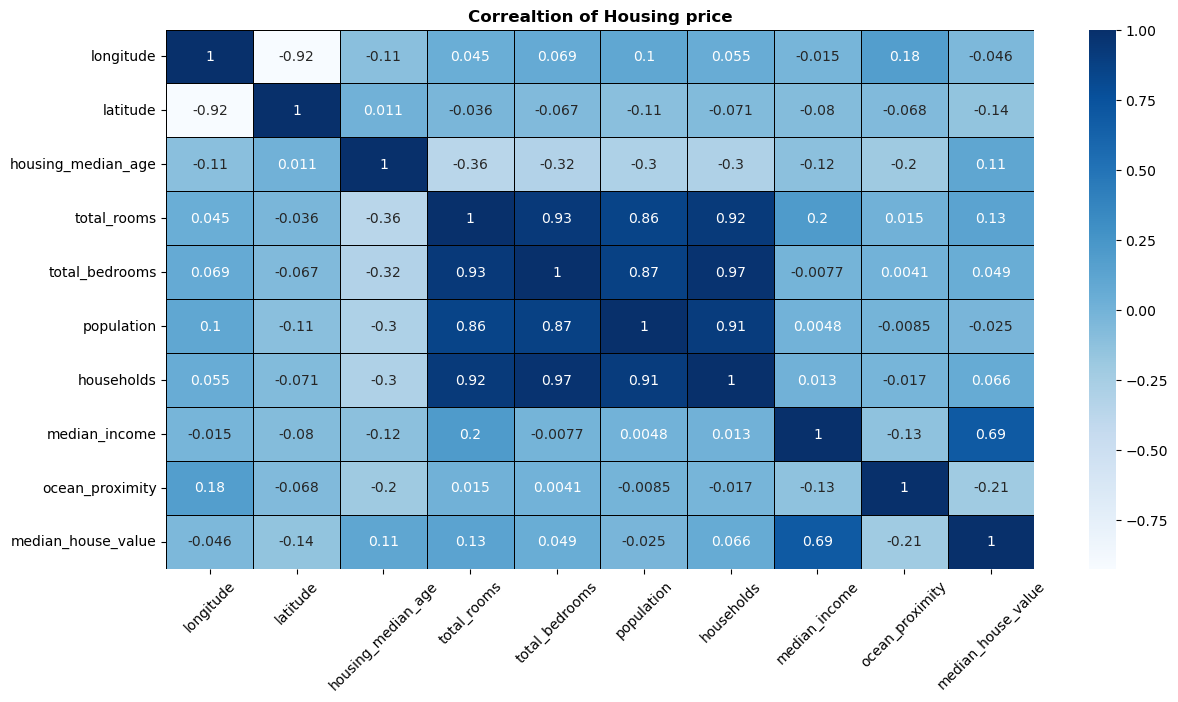

In [15]:
corr_mat = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,cmap ="Blues",annot=True,linewidth=0.5,linecolor ="black")
plt.title("Correaltion of Housing price", loc="center", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Feature Distributions (Histograms)

In this cell, we visualize the distribution of all numerical features using histograms:

- `data.hist(figsize=(15,15))` plots a histogram for each numerical column in the dataset.
- Helps us understand:
  1. The range and spread of each feature.
  2. Skewness or non-normal distributions.
  3. Presence of outliers.
- This step is important before building the Linear Regression model to check if any feature transformations might be needed.


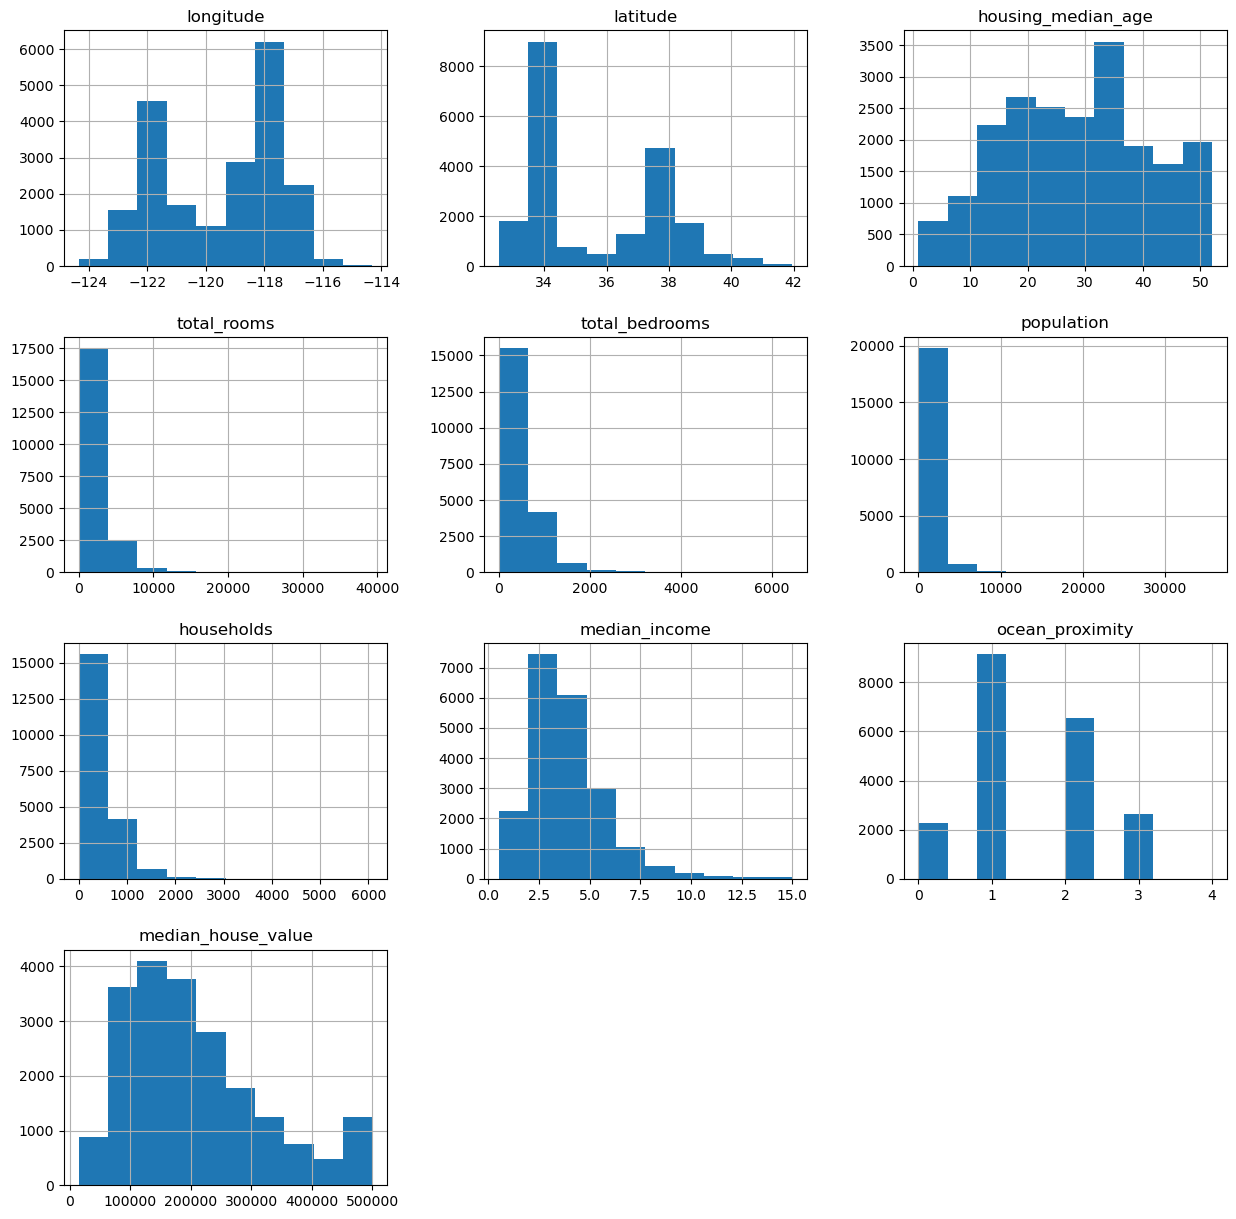

In [16]:
data.hist(figsize=(15,15))
plt.show()

# Scatter Plots of Features vs Target

In this cell, we visualize the relationship between each numerical feature and the target variable `median_house_value` using scatter plots:

1. We select all features except the first two columns (`longitude` & `latitude`) and the target column.
2. Each feature is plotted against `median_house_value` to see how it influences the target.
3. `sns.scatterplot()` is used for plotting the data points:
   - Each feature has a unique color for clarity.
4. We use `plt.subplot()` to organize multiple plots in a grid (4 rows × 2 columns).
5. This helps us:
   - Identify features with a **strong linear relationship** to the target.
   - Detect **outliers** that might affect the model.
   - Decide if feature transformations are needed before modeling.


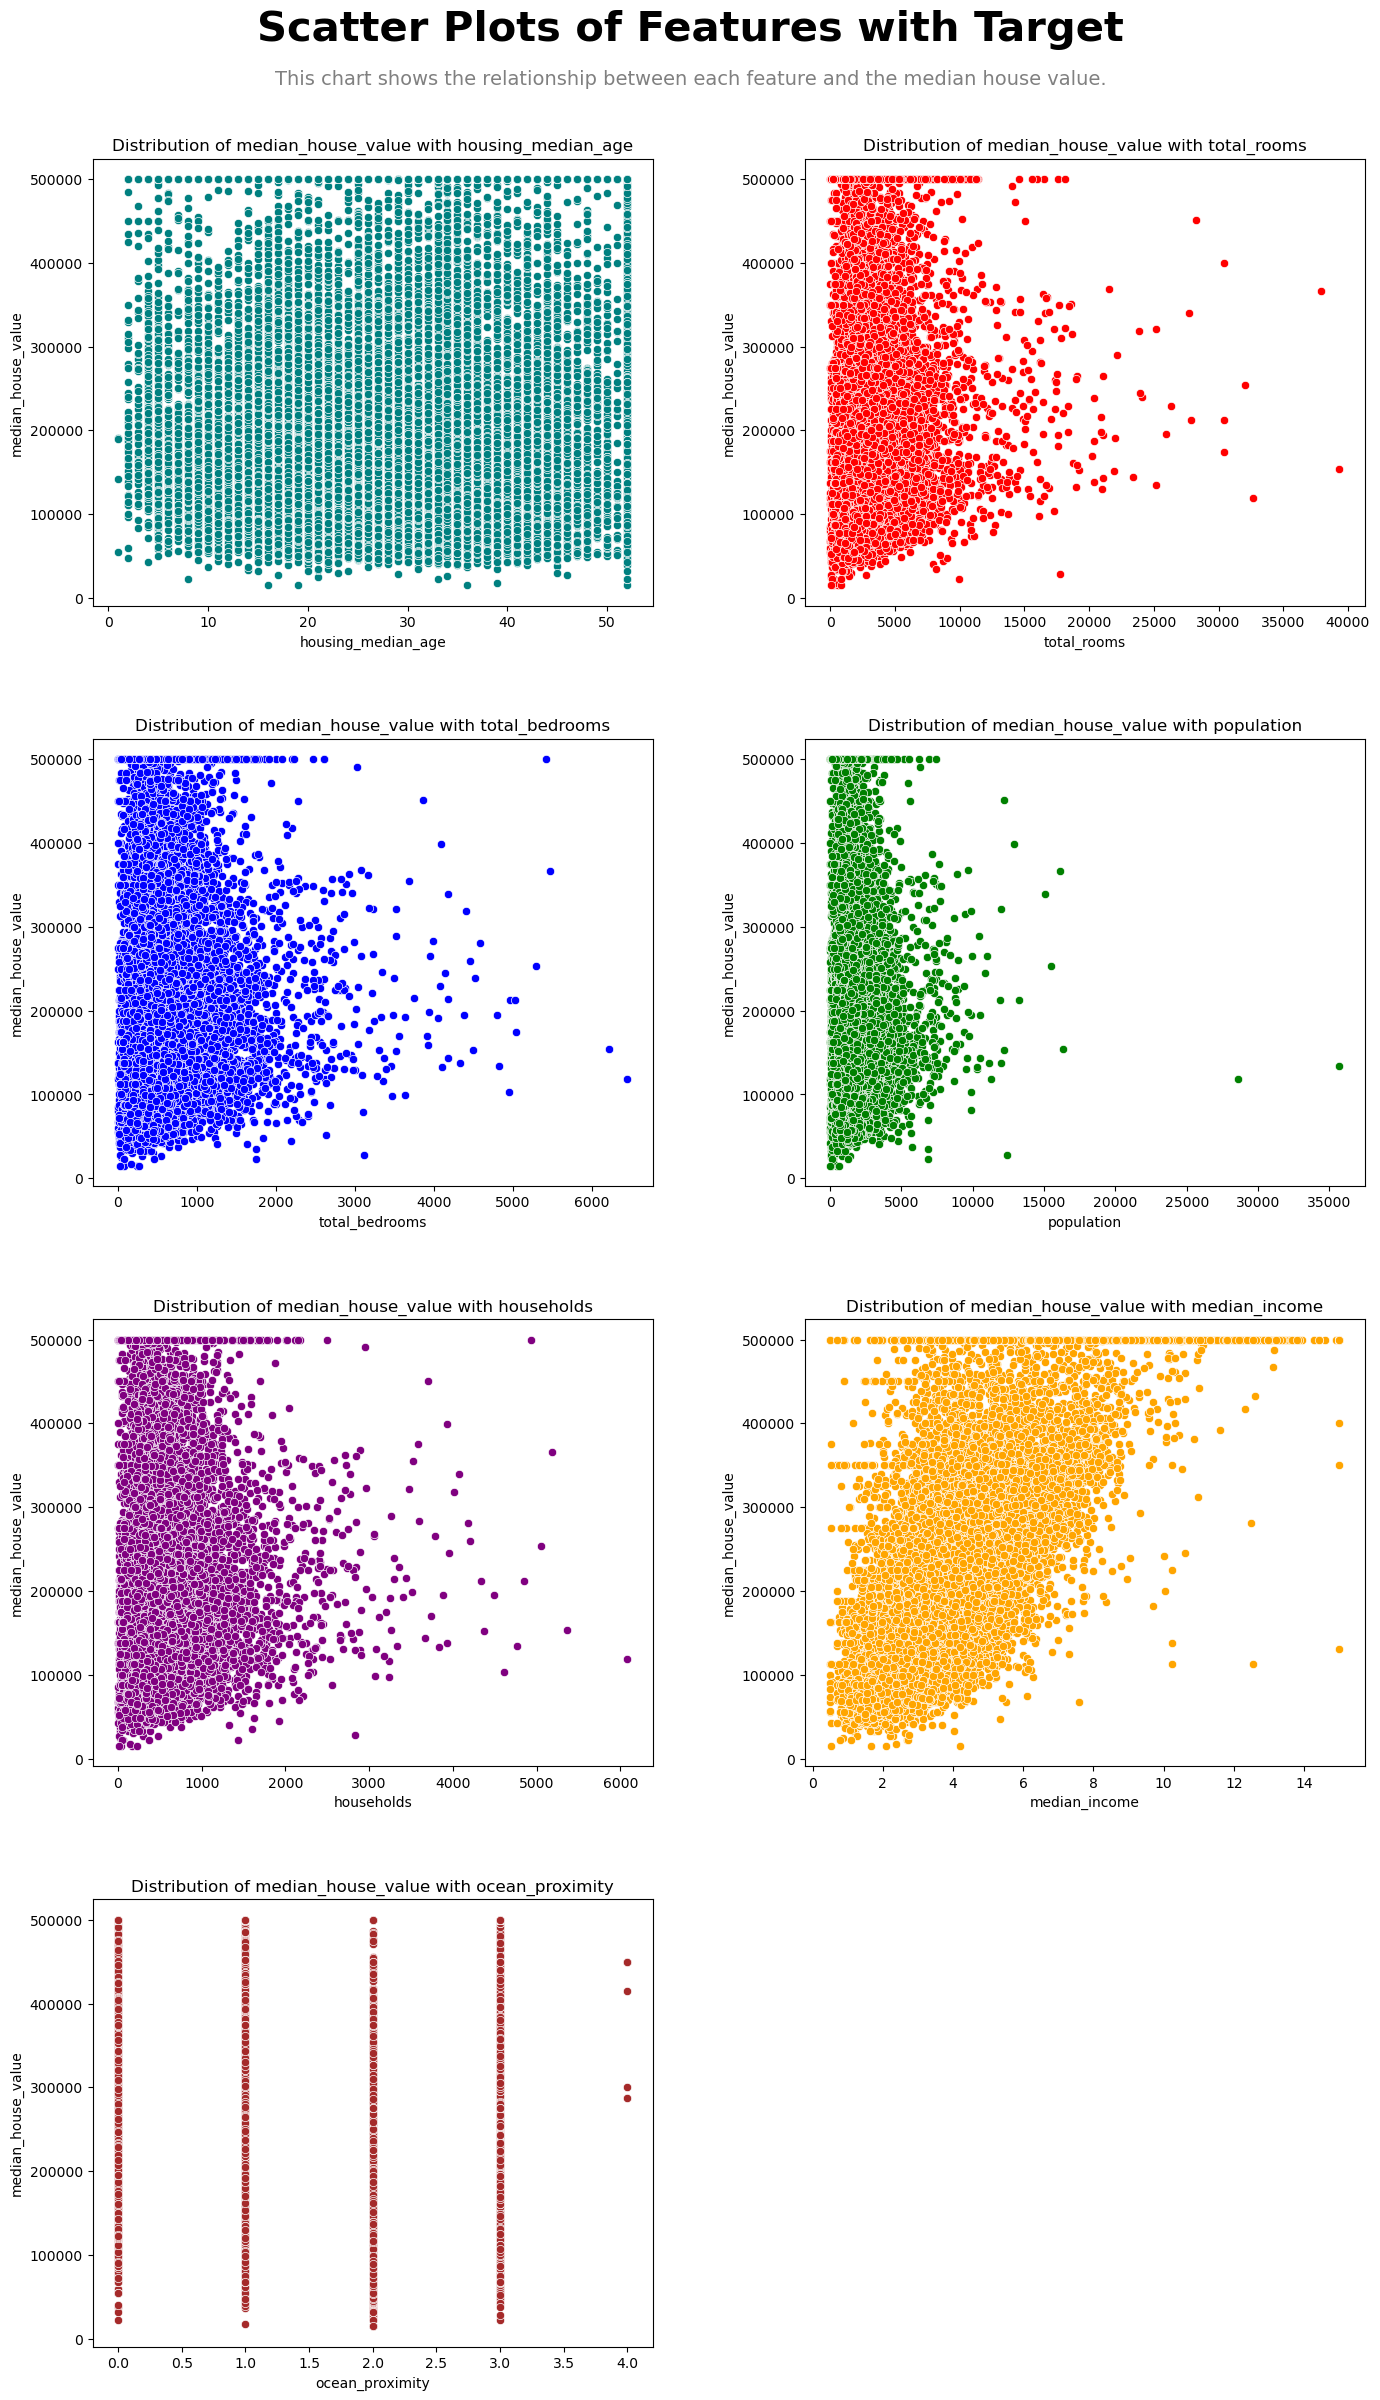

In [17]:
feature = data.columns[2:-1]
colors = ['teal', 'red', 'blue', 'green', 'purple', 'orange', 'brown', 'black', 'yellow']

plt.figure(figsize=(15, 25))
plt.suptitle('Scatter Plots of Features with Target', fontsize=30, fontweight='bold', y=0.98) 
plt.figtext(0.5, 0.95, 'This chart shows the relationship between each feature and the median house value.', ha='center', fontsize=14, color='gray')

for i, plot in enumerate(feature, start=1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=data[plot], y=data['median_house_value'], color=colors[i-1])
    plt.title(f'Distribution of median_house_value with {plot}')
    plt.ylabel('median_house_value')
    plt.xlabel(plot)

plt.tight_layout(pad=5)
plt.show()

# Separating Features and Target

In this cell, we prepare the dataset for modeling by separating the **features (X)** from the **target (y)**:

1. `x = data.drop('median_house_value', axis='columns')`:
   - Removes the target column `median_house_value` from the dataset.
   - Stores all other columns in `x`, which will be used as input features for the model.

2. `x.head()`:
   - Displays the first 5 rows of the features to verify the data is correct.


In [18]:
x = data.drop('median_house_value', axis='columns')
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0


In [19]:
y = data['median_house_value']
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

# Splitting Data into Training and Testing Sets

In this cell, we split the dataset into **training** and **testing** sets using `train_test_split`:

1. **x_train, y_train** → Used to train the Linear Regression model.
2. **x_test, y_test** → Used to evaluate the model's performance on unseen data.
3. Parameters:
   - `test_size=0.2` → 20% of the data is used for testing, 80% for training.
   - `random_state=42` → Ensures reproducibility of the split.


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
print('intercept:', reg.intercept_)

intercept: -3496010.4626615057


In [23]:
cdf = pd.DataFrame(reg.coef_, x.columns, columns=['coef'])
cdf

,coef
longitude,-41832.099626
latitude,-41881.005137
housing_median_age,1146.880531
total_rooms,-7.819068
total_bedrooms,114.970518
population,-38.707457
households,45.894344
median_income,40300.312585
ocean_proximity,-3151.309000


In [24]:
y_pred = reg.predict(x_test)
y_pred

array([ 74987.79670251, 164722.48207222, 268078.43623126, ...,
       438928.14169585, 129292.40788111, 177122.75454932])

In [25]:
residuals = y_test - y_pred

# Residuals and Model Evaluation

In this cell, we analyze the performance of the Linear Regression model:

1. **Residuals Plot**:
   - `residuals = y_test - y_pred` (difference between actual and predicted values)
   - `sns.displot(residuals, bins=30, kde=True)` visualizes the distribution of residuals.
   - Helps check if residuals are approximately normally distributed around 0, which indicates a good fit.

2. **Evaluation Metrics**:
   - `Mean Squared Error (MSE)`: Measures the average squared difference between predicted and actual values.
   - `Mean Absolute Error (MAE)`: Measures the average absolute difference between predicted and actual values.
   - `R² Score`: Indicates how well the model explains the variance in the target variable (1 = perfect prediction, 0 = no explanation).

These metrics help us understand the accuracy and reliability of our model.


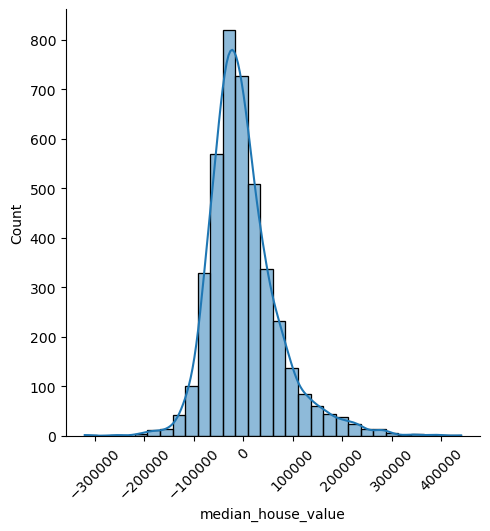

In [26]:
sns.displot(residuals, bins = 30, kde = True)
plt.xticks(rotation=45)
plt.show()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")
print(f'Training Accuracy: {reg.score(x_train, y_train)}')
print(f"Testing Accuracy: {reg.score(x_test, y_test)}")

Mean Squared Error: 5050795292.459146
Mean Absolute Error: 51832.73001740958
R-Squared: 0.6145634396339865
Training Accuracy: 0.6405582873921803
Testing Accuracy: 0.6145634396339865


# True vs Predicted Values

In this cell, we visualize how well the Linear Regression model predicts the target variable `median_house_value`:

1. `plt.scatter(y_test, y_pred, ...)`:
   - Plots the actual values (`y_test`) on the x-axis versus the predicted values (`y_pred`) on the y-axis.
   - Points closer to the **red dashed line** indicate more accurate predictions.

2. `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)`:
   - Draws a reference line where predicted values exactly equal actual values.
   - Helps easily see under- or over-predictions.

3. This plot is useful to visually assess:
   - Accuracy of the model
   - Presence of systematic errors
   - Outliers or extreme predictions


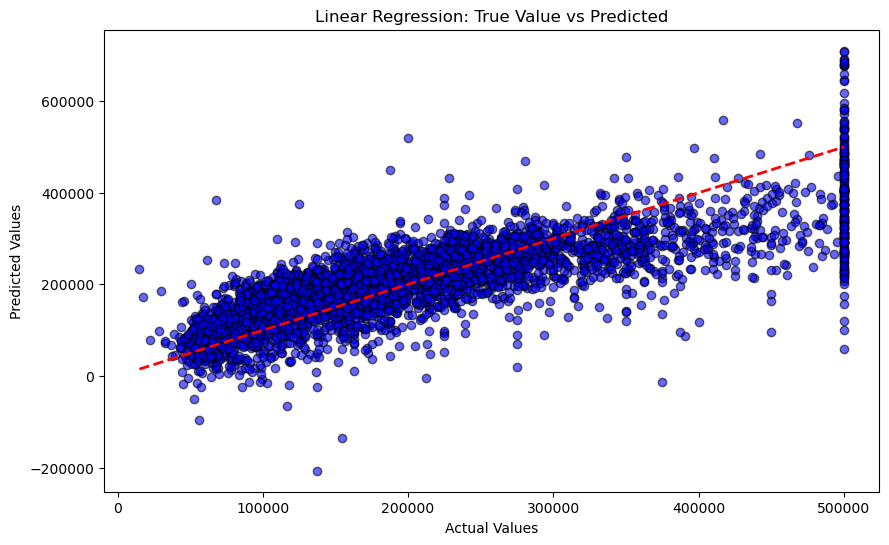

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Value vs Predicted')
plt.show()

# Predicting the Price of a New House

In this cell, we use our trained Linear Regression model to predict the median house value for a new house:

1. **Create a DataFrame `new_house`** with the feature values of the new property:
   - `longitude`, `latitude`: geographic coordinates
   - `housing_median_age`: median age of houses in the area
   - `total_rooms`, `total_bedrooms`: number of rooms and bedrooms
   - `population`, `households`: population and households in the area
   - `median_income`: average income of the area
   - `ocean_proximity`: numerical encoding of proximity to the ocean (0–4)

2. **Use `reg.predict()`**:
   - The model takes the new features as input and outputs the predicted median house value.

3. **Output**:
   - `predicted_price[0]` gives the predicted value as a single number, instead of an array.


In [31]:
# Predict price of new house

new_house = pd.DataFrame({
    'longitude': [-122.23],       
    'latitude': [37.88],          
    'housing_median_age': [41],    
    'total_rooms': [880],         
    'total_bedrooms': [129],      
    'population': [322],          
    'households': [126],          
    'median_income': [8.3252],
    
    'ocean_proximity': [1]        #  mapping: 0=NEAR BAY, 1=<1H OCEAN, 2=INLAND, 3=NEAR OCEAN, 4=ISLAND
}
                        )

predicted_price = reg.predict(new_house)
print("Predicted median house value:", predicted_price[0])


Predicted median house value: 411322.8581603952
